# CH10 K-means

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## K-means

### Helper

In [2]:
def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        dataMat.append(curLine)
    return dataMat

### Distance

In [3]:
# SSE 
def distEclud(vecA, vecB):
    return np.sqrt(sum(np.power(vecA - vecB, 2).A[0])) #la.norm(vecA-vecB)

In [4]:
def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.mat(np.zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = np.mat(minJ + rangeJ * np.random.rand(k,1))
    return centroids

In [5]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m,2)))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = np.inf; minIndex = -1
            for j in range(k):
                distJI = distEclud(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            # SE距离平方
            clusterAssment[i,:] = minIndex,minDist**2
        print (centroids)
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = np.mean(ptsInClust, axis=0) #assign centroid to mean 
    return centroids, clusterAssment

In [6]:
datMat = np.mat(loadDataSet("./Data/CH10/testSet.txt")).astype(float)

In [7]:
min(datMat[:,0])

matrix([[-5.379713]])

In [8]:
min(datMat[:,1])

matrix([[-4.232586]])

In [9]:
max(datMat[:,1])

matrix([[5.1904]])

In [10]:
max(datMat[:,0])

matrix([[4.838138]])

In [11]:
randCent(datMat,2)

matrix([[ 1.97858954,  4.18020292],
        [-3.99539934, -0.4134828 ]])

In [12]:
datMat[0]

matrix([[1.658985, 4.285136]])

In [13]:
distEclud(datMat[0],datMat[1])

5.184632816681332

In [14]:
myCentroids, clustAssing = kMeans(datMat.A,4)

[[-2.44214568  0.13005507]
 [ 1.34254419  1.36100476]
 [-0.1068514   3.72637631]
 [-2.57067038 -0.96824261]]
[[-3.28403017  2.157734  ]
 [ 2.96911125 -0.3260355 ]
 [-0.86695765  3.4051668 ]
 [-3.01169468 -3.01238673]]
[[-3.17006745  2.60393509]
 [ 3.09181665 -1.14418992]
 [ 0.59293976  3.41534552]
 [-3.01169468 -3.01238673]]
[[-2.64677572  2.78993217]
 [ 2.8675685  -2.36043623]
 [ 2.1956904   3.250082  ]
 [-3.38237045 -2.9473363 ]]
[[-2.46154315  2.78737555]
 [ 2.80293085 -2.7315146 ]
 [ 2.6265299   3.10868015]
 [-3.38237045 -2.9473363 ]]


In [19]:
# clustAssing[:,0] index
# clustAssing[:,1] error
data_ = np.hstack([clustAssing.A,datMat.A])
data_[data_[:,0]==3,:]

array([[ 3.        ,  4.16140951, -5.379713  , -3.362104  ],
       [ 3.        ,  1.50646425, -3.487105  , -1.724432  ],
       [ 3.        ,  0.37776947, -2.786837  , -3.099354  ],
       [ 3.        ,  9.97310599, -0.39237   , -3.963704  ],
       [ 3.        ,  0.4748908 , -3.195883  , -2.283926  ],
       [ 3.        ,  0.02901818, -3.403367  , -2.778288  ],
       [ 3.        ,  0.45794272, -4.007257  , -3.207066  ],
       [ 3.        ,  0.5562375 , -3.674424  , -2.261084  ],
       [ 3.        ,  0.94766018, -2.579316  , -3.497576  ],
       [ 3.        ,  0.30141541, -3.837877  , -3.253815  ],
       [ 3.        ,  3.24171404, -2.121479  , -4.232586  ],
       [ 3.        ,  0.4095639 , -3.762093  , -2.432191  ],
       [ 3.        ,  1.8679679 , -4.323818  , -3.938116  ],
       [ 3.        ,  0.39398674, -4.009299  , -2.978115  ],
       [ 3.        ,  0.43536936, -3.171184  , -3.572452  ],
       [ 3.        ,  1.54154401, -2.565729  , -2.012114  ],
       [ 3.        ,  0.

In [22]:
myCentroids[:,1]

matrix([[ 2.78737555],
        [-2.7315146 ],
        [ 3.10868015],
        [-2.9473363 ]])

### Visulization

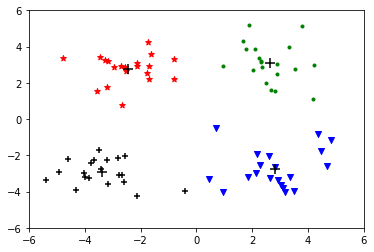

In [27]:
plt.figure()
plt.scatter(data_[data_[:,0]==0,:][:,2],data_[data_[:,0]==0,:][:,3],marker="*",c="red")
plt.scatter(data_[data_[:,0]==1,:][:,2],data_[data_[:,0]==1,:][:,3],marker="v",c="blue")
plt.scatter(data_[data_[:,0]==2,:][:,2],data_[data_[:,0]==2,:][:,3],marker=".",c="green")
plt.scatter(data_[data_[:,0]==3,:][:,2],data_[data_[:,0]==3,:][:,3],marker="+",c="black")
plt.scatter(myCentroids.A[:,0],myCentroids.A[:,1],marker="+",c="black",s=100)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()

### Postprocessing

- 合并最近质心
- 合并使得SSE增幅最小的质心
- 以下不停的运行，随机初始化质心的结果会影响最后的结果。

[[-2.247591    1.62582149]
 [-1.30212613 -3.17546922]
 [-0.71163075 -3.75432043]]
[[-0.00675605  3.22710297]
 [-1.12616164 -2.30193564]
 [ 0.35496167 -3.36033556]]


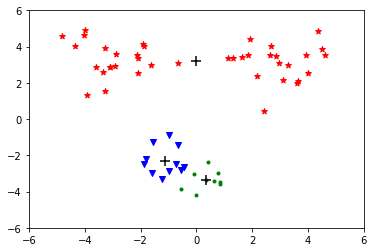

In [63]:
datMat3 = loadDataSet("./Data/CH10/testSet2.txt")
datMat3 = np.mat(datMat3).astype(float)
myCentroids, clustAssing = kMeans(datMat3.A,3)
data_ = np.hstack([clustAssing.A,datMat3.A])
data_[data_[:,0]==3,:]
plt.figure()
plt.scatter(data_[data_[:,0]==0,:][:,2],data_[data_[:,0]==0,:][:,3],marker="*",c="red")
plt.scatter(data_[data_[:,0]==1,:][:,2],data_[data_[:,0]==1,:][:,3],marker="v",c="blue")
plt.scatter(data_[data_[:,0]==2,:][:,2],data_[data_[:,0]==2,:][:,3],marker=".",c="green")
plt.scatter(data_[data_[:,0]==3,:][:,2],data_[data_[:,0]==3,:][:,3],marker="+",c="black")
plt.scatter(myCentroids.A[:,0],myCentroids.A[:,1],marker="+",c="black",s=100)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()

## Bisecting K-means

In [33]:
def biKmeans(dataSet, k, distMeas=distEclud):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    centroid0 = np.mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m):#calc initial Error
        clusterAssment[j,1] = distEclud(np.mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = np.inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0].A==i)[0],:]#get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distEclud)
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[np.nonzero(clusterAssment[:,0].A!=i)[0],1])
            print ("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit
        print ('the bestCentToSplit is: ',bestCentToSplit)
        print ('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[np.nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE
    return np.mat(centList), clusterAssment

In [34]:
datMat3 = loadDataSet("./Data/CH10/testSet2.txt")
datMat3 = np.mat(datMat3).astype(float)
centList, myNewAssments = biKmeans(datMat3,3)

[[ 4.41250738  2.54635056]
 [-1.21344133 -0.04920113]]
[[ 2.93386365  3.12782785]
 [-1.70351595  0.27408125]]
sseSplit, and notSplit:  [[541.29762926]] 0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
[[1.8358769  1.09081986]
 [2.92529242 4.45390204]]
[[2.9930168  1.8203236 ]
 [2.91414593 3.5636626 ]]
[[3.1604785  1.93671333]
 [2.836743   3.6383055 ]]
sseSplit, and notSplit:  [[26.92837226]] [[501.76833058]]
[[-0.59802004 -0.96963116]
 [-2.92244337 -2.11054074]]
[[-1.5567835   0.47048606]
 [-2.53499983 -0.83887933]]
[[-2.85434624  3.12586329]
 [-0.43154563 -2.87788837]]
[[-2.94737575  3.3263781 ]
 [-0.45965615 -2.7782156 ]]
sseSplit, and notSplit:  [[67.22020008]] [[39.52929868]]
the bestCentToSplit is:  1
the len of bestClustAss is:  40


### Visulization

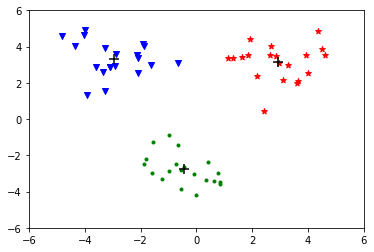

In [37]:
data_ = np.hstack([myNewAssments.A,datMat3.A])
data_[data_[:,0]==3,:]
plt.figure()
plt.scatter(data_[data_[:,0]==0,:][:,2],data_[data_[:,0]==0,:][:,3],marker="*",c="red")
plt.scatter(data_[data_[:,0]==1,:][:,2],data_[data_[:,0]==1,:][:,3],marker="v",c="blue")
plt.scatter(data_[data_[:,0]==2,:][:,2],data_[data_[:,0]==2,:][:,3],marker=".",c="green")
plt.scatter(centList.A[:,0],centList.A[:,1],marker="+",c="black",s=100)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()

## EX : Map

In [64]:
def distSLC(vecA, vecB):#Spherical Law of Cosines
    a = np.sin(vecA[0,1]*pi/180) * np.sin(vecB[0,1]*np.pi/180)
    b = np.cos(vecA[0,1]*pi/180) * np.cos(vecB[0,1]*np.pi/180) * \
                      np.cos(pi * (vecB[0,0]-vecA[0,0]) /180)
    return arccos(a + b)*6371.0 #pi is imported with numpy


In [70]:
def clusterClubs(numClust=5):
    datList = []
    for line in open('./Data/CH10/places.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = np.mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('./Data/CH10/Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[np.nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()


[[-122.78818362   45.44369384]
 [-122.79060069   45.47196334]]
[[-122.65163909   45.43860582]
 [-122.62789014   45.52628445]]
[[-122.7288018    45.45886713]
 [-122.60469687   45.52715102]]
[[-122.73970628   45.48893289]
 [-122.59354794   45.52055627]]
[[-122.73218377   45.50489832]
 [-122.58463011   45.51577445]]
[[-122.72067704   45.51464126]
 [-122.57446138   45.5108059 ]]
[[-122.7142141    45.51492203]
 [-122.56818551   45.5102949 ]]
[[-122.70981637   45.51478609]
 [-122.56409551   45.51016235]]
[[-122.70766576   45.51319176]
 [-122.56201911   45.51149539]]
sseSplit, and notSplit:  [[0.35591468]] 0
the bestCentToSplit is:  0
the len of bestClustAss is:  69
[[-122.69315088   45.41639959]
 [-122.72202927   45.61488315]]
[[-122.71595071   45.47576412]
 [-122.698863     45.55295862]]
[[-122.7323248    45.46958973]
 [-122.68711656   45.54952678]]
[[-122.74453654   45.46591269]
 [-122.68369975   45.54392315]]
[[-122.761804     45.46639582]
 [-122.68059664   45.53658973]]
sseSplit, and not

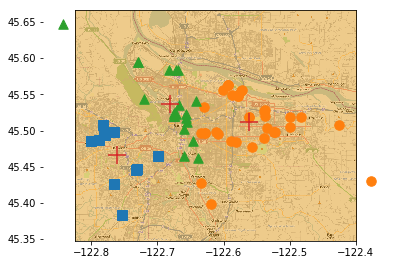

In [74]:
clusterClubs(3)